# Guided Project: Popular Data Science Questions

## Stack Exchange

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and [data science](https://datascience.stackexchange.com/)! Here's a sample of the most popular sites:
![](https://dq-content.s3.amazonaws.com/469/se_sites.png)
Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

If you're not familiar with Stack Overflow or any other Stack Exchange site, you can check out this tour.

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:

- Data Science
- Cross Validated — a statistics site
- Artificial Intelligence
- Mathematics
- Stack Overflow

And if we want to include Data Engineering, we can also consider:

- Database Administrators
- Unix & Linux
- Software Engineering

If you open the link in the image shared above, you'll find a complete list of Stack Exchange websites sorted by percentage of questions that received answers. At the time of this writing, Data Science Stack Exchange (DSSE) is on the bottom 10 sites with respect to this metric.

The fact that DSSE is a data science dedicated site (contrarily to the others), coupled with it having a lot of unanswered questions, makes it an ideal candidate for this investigation. DSSE will be the focus of this guided project.

## Stack Exchange Data Explorer

Run SQL queries [here](https://data.stackexchange.com/datascience/query/edit/1702372#resultSets)

**Running the query below on `tags` table:**

`
SELECT TOP 20 
    *
FROM tags
ORDER BY Count DESC;
`
 
 **yields**  
 
 **Id** | **TagName**         | **Count** | **ExcerptPostId** | **WikiPostId** | **IsModeratorOnly** | **IsRequired** 
--------|---------------------|-----------|-------------------|----------------|---------------------|----------------
 2      | machine-learning    | 11007     | 4909              | 4908           |                     |                
 46     | python              | 6510      | 5523              | 5522           |                     |                
 194    | deep-learning       | 4769      | 8956              | 8955           |                     |                
 81     | neural-network      | 4262      | 8885              | 8884           |                     |                
 77     | classification      | 3165      | 4911              | 4910           |                     |                
 324    | keras               | 2716      | 9251              | 9250           |                     |                
 47     | nlp                 | 2532      | 147               | 146            |                     |                
 128    | scikit-learn        | 2245      | 5896              | 5895           |                     |                
 321    | tensorflow          | 2173      | 9183              | 9182           |                     |                
 72     | time-series         | 1796      | 8904              | 8903           |                     |                
 157    | regression          | 1542      | 8906              | 8905           |                     |                
 24     | r                   | 1480      | 49                | 48             |                     |                
 61     | dataset             | 1427      | 8889              | 8888           |                     |                
 557    | cnn                 | 1370      | 28890             | 28889          |                     |                
 15     | clustering          | 1356      | 145               | 144            |                     |                
 64     | pandas              | 1294      | 9185              | 9184           |                     |                
 5      | data-mining         | 1174      | 80                | 79             |                     |                
 527    | lstm                | 1173      | 25536             | 25535          |                     |                
 168    | predictive-modeling | 1164      | 8902              | 8901           |                     |                
 27     | statistics          | 1096      | 3790              | 3789           |                     |                

 

**Running the query below on `Posts` table:**

`
SELECT TOP 20 
    Id, 
    Tags,
    ViewCount
FROM Posts
ORDER BY ViewCount DESC;
`

**yields**
  
| **Id** | **Tags**                                                                   | **ViewCount** |
|--------|----------------------------------------------------------------------------|---------------|
| 20199  |  python scikit-learn sampling                                              | 409427        |
| 11928  |  python scikit-learn pandas random-forest python-3.x                       | 409233        |
| 13490  |  deep-learning classification keras weighted-data                          | 386034        |
| 893    |  r statistics correlation                                                  | 366957        |
| 33053  |  pandas dataframe                                                          | 353725        |
| 15135  |  machine-learning scikit-learn cross-validation                            | 339519        |
| 15989  |  multiclass-classification evaluation                                      | 337528        |
| 12321  |  python scikit-learn                                                       | 334281        |
| 14899  |  machine-learning neural-network deep-learning svm software-recommendation | 312792        |
| 37435  |  python pandas dataframe csv                                               | 295791        |
| 22     |  data-mining clustering octave k-means categorical-data                    | 283836        |
| 6107   |  neural-network convolutional-neural-network convolution                   | 263307        |
| 37878  |  python pandas dataframe                                                   | 229432        |
| 26333  |  pandas                                                                    | 210092        |
| 12851  |  machine-learning neural-network deep-learning visualization               | 200534        |
| 10459  |  python statistics visualization pandas                                    | 192251        |
| 45314  |  python pandas                                                             | 188965        |
| 14581  |  neural-network deep-learning lstm gru                                     | 170221        |
| 45165  |  machine-learning neural-network deep-learning classification keras        | 168658        |
| 9302   |  machine-learning tensorflow                                               | 164323        |


## Getting the Data

**Exploring the distribution of different types of posts by this query:**

`
SELECT 
  Posts.PostTypeId, 
  PostTypes.Name
  COUNT(*) as NrOfPosts,
FROM Posts
LEFT JOIN PostTypes
  ON Posts.PostTypeId = PostTypes.Id
GROUP BY Posts.PostTypeId, PostTypes.Name
ORDER BY NrOfPosts DESC;
`

| **PostTypeId** | **NrOfPosts** | **Name**              |
|----------------|---------------|-----------------------|
|  2             |  39004        |  Answer               |
|  1             |  35554        |  Question             |
|  5             |  329          |  TagWiki              |
|  4             |  329          |  TagWikiExcerpt       |
|  6             |  14           |  ModeratorNomination  |
|  7             |  1            |  WikiPlaceholder      |


So it is clear that only Question and Answer posts make up a significant proportion of the posts.

Run a query against the SEDE DSSE database that extracts the columns listed above for all the ***questions (TypeId = 1)*** in ***2019 (creation)***:

- `Id` - An identification number for the post.
- `PostTypeId` - An identification number for the type of post.
- `CreationDate` - The date and time of creation of the post.
- `Score` - The post's score.
- `ViewCount`- How many times the post was viewed.
- `Tags` - What tags were used.
- `AnswerCount` - How many answers the question got (only applicable to question posts).
- `FavoriteCount` - How many times the question was favored (only applicable to question posts).

`
SELECT 
  Id, 
  PostTypeID,
  CreationDate,
  Score,
  ViewCount,
  Tags,
  AnswerCount,
  FavoriteCount
FROM Posts
WHERE PostTypeID = 1 AND YEAR(CreationDate) = 2019;
`


## Exploring the Data

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
questions_2019 = pd.read_csv('2019_questions.csv', parse_dates = ['CreationDate'])

questions_2019.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [59]:
questions_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [60]:
questions_2019.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

Explore the data. Try to answer a few of these questions in a markdown cell:

- How many missing values are there in each column?
   * *The only column with missing values was `FavoriteCount`.*
   
   
- Can we fix the missing values somehow?
    * *It was assumed that missing value indicated that there was no favorite by anyone - impute zero for missing.*
    
    
- Are the types of each column adequate?
    * *We could convert the `FavoriteCount` column into `int` instead of `float`, all other columns appeared fine.*
    * *The `Tags` column is `object` type that could be better represented.*
    
    
- What can we do about the Tags column?
    * *We could convert the `<tag>` like structure into `,` separated `str`, which could be splited into a list.*

## Cleaning the Data

In [61]:
questions_2019['FavoriteCount'].value_counts(dropna = False)

NaN     7432
1.0      953
2.0      205
0.0      175
3.0       43
4.0       12
5.0        8
7.0        4
6.0        4
11.0       1
16.0       1
8.0        1
Name: FavoriteCount, dtype: int64

In [62]:
# Impute zero for missing favorite counts

questions_2019['FavoriteCount'].fillna(value = 0, inplace = True)

questions_2019['FavoriteCount'] = questions_2019['FavoriteCount'].astype('int')

questions_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 449.0+ KB


In [63]:
questions_2019['FavoriteCount'].value_counts(dropna = False)

0     7607
1      953
2      205
3       43
4       12
5        8
7        4
6        4
11       1
16       1
8        1
Name: FavoriteCount, dtype: int64

In [64]:
questions_2019.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0


In [65]:
# %%time

questions_2019['Tags'] = questions_2019['Tags'].str.replace('<','').str.replace('>',',').str.strip(',').str.split(',')
questions_2019.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


In [66]:
# %%time

# # Can replace leading < and ending > at once - the split by ><

# questions_2019["Tags"] = questions_2019["Tags"].str.replace("^<|>$", "").str.split("><")
# print(questions_2019.head())

## Most Used and Most Viewed

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

We could take into account the score, or whether or not a question is part of someone's favorite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now.

Instructions
- Count how many times each tag was used.
- Count how many times each tag was viewed.
- Create visualizations for the top tags of each of the above results.

In [67]:
# Use pd.DataFrame.explode here

tag_use_and_view = questions_2019.explode('Tags').groupby('Tags').agg(UseCount = ('ViewCount', 'size'), ViewCount = ('ViewCount', np.sum))
tag_use_and_view.sort_values(['UseCount', 'ViewCount'], ascending = False, inplace = True)
tag_use_and_view.head(20)

,UseCount,ViewCount
Tags,,
machine-learning,2693,388499
python,1814,537585
deep-learning,1220,233628
neural-network,1055,185367
keras,935,268608
classification,685,104457
tensorflow,584,121369
scikit-learn,540,128110
nlp,493,71382


In [68]:
tag_use_counts = {}
tag_view_counts = {}

def count_tags(row, tag_use_counts, tag_view_counts):
    
    tags = row['Tags']
    
    for tag in tags:

        tag_use_counts[tag] = tag_use_counts.get(tag, 0) + 1
        tag_view_counts[tag] = tag_view_counts.get(tag, 0) + row['ViewCount']

In [69]:
_out = questions_2019.apply(count_tags, tag_use_counts = tag_use_counts, tag_view_counts = tag_view_counts, axis = 1)

In [70]:
tag_use_df = pd.DataFrame.from_dict(tag_use_counts, orient = 'index')
tag_use_df.rename(columns = {0:'use_count'}, inplace = True)
tag_use_df.head()

,use_count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50


In [71]:
tag_view_df = pd.DataFrame.from_dict(tag_view_counts, orient = 'index')
tag_view_df.rename(columns = {0:'view_count'}, inplace = True)
tag_view_df.head()

,view_count
machine-learning,388499
data-mining,31056
regression,49451
linear-regression,18978
regularization,4941


In [72]:
tag_use_df.sort_values('use_count', ascending = False, inplace = True)
tag_use_df.head(10)

,use_count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [73]:
tag_view_df.sort_values('view_count', ascending = False, inplace = True)
tag_view_df.head(10)

,view_count
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


<AxesSubplot: title={'center': 'Top 20 tags that have been used in 2019'}>

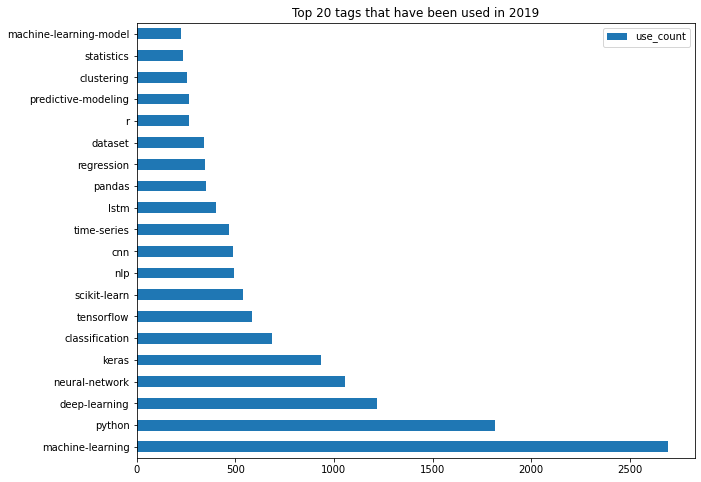

In [74]:
%matplotlib inline

# Visualize tag use counts
tag_use_df[:20].plot(kind = 'barh', figsize = (10,8), 
                    title = 'Top 20 tags that have been used in 2019')

<AxesSubplot: title={'center': 'Top 20 tags that have been viewed in 2019'}>

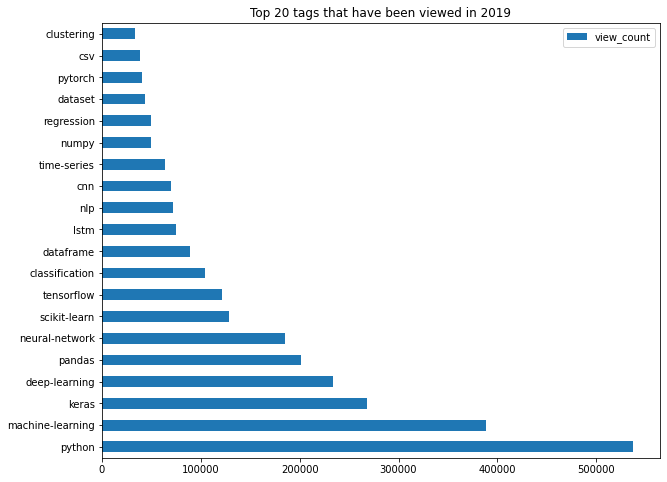

In [75]:
%matplotlib inline

# Visualize tag view counts
tag_view_df[:20].plot(kind = 'barh', figsize = (10,8),
                      title = 'Top 20 tags that have been viewed in 2019')

## Relations Between Tags

In [76]:
use_and_view = pd.merge(tag_use_df, tag_view_df, how = 'left', left_index = True, right_index = True)
use_and_view.head()

,use_count,view_count
machine-learning,2693,388499
python,1814,537585
deep-learning,1220,233628
neural-network,1055,185367
keras,935,268608


<AxesSubplot: title={'center': 'Correlation between tag views and uses'}, xlabel='use_count', ylabel='view_count'>

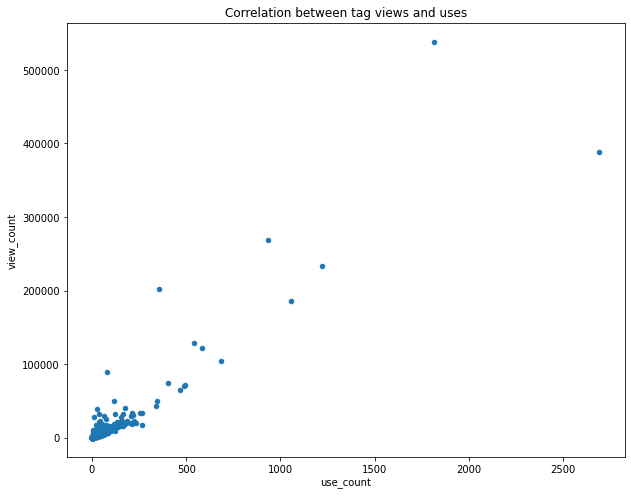

In [77]:
%matplotlib inline
use_and_view.plot(kind = 'scatter', x = 'use_count', y = 'view_count', 
                 figsize = (10,8), title = 'Correlation between tag views and uses')

In [78]:
use_and_view.corr()

,use_count,view_count
use_count,1.000000,0.926224
view_count,0.926224,1.000000


Clearly, tags that were used more frequently were also likely to be viewed more often.

In [79]:
use_top10, view_top10 = tag_use_df[:10], tag_view_df[:10]
use10_view10 = pd.merge(use_top10, view_top10, how = 'outer', left_index = True, right_index = True)
use10_view10

,use_count,view_count
classification,685.0,104457.0
cnn,489.0,NaN
dataframe,NaN,89352.0
deep-learning,1220.0,233628.0
keras,935.0,268608.0
machine-learning,2693.0,388499.0
neural-network,1055.0,185367.0
nlp,493.0,NaN
pandas,NaN,201787.0
python,1814.0,537585.0


**It can be observed that:**

* 'dataframe' and 'pandas' were viewed lot even though they were not the top used tags;
* 'cnn' and 'nlp' were frequently used tags but were not viewed as much.

In [80]:
all_tags = list(tag_use_df.index)

associations = pd.DataFrame(index = all_tags, columns=all_tags)
associations.iloc[0:10,0:10]

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn
machine-learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deep-learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neural-network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tensorflow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nlp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Add one for each pair of tags appearing together

associations.fillna(0, inplace=True)

for tags in questions_2019["Tags"]:
    associations.loc[tags, tags] += 1

In [82]:
popular_tags = use10_view10.index

associations.loc[popular_tags, popular_tags]

,classification,cnn,dataframe,deep-learning,keras,machine-learning,neural-network,nlp,pandas,python,scikit-learn,tensorflow
classification,685,20,1,59,58,259,65,35,3,98,47,20
cnn,20,489,0,160,116,124,118,7,1,62,0,57
dataframe,1,0,81,0,0,6,0,0,60,51,2,0
deep-learning,59,160,0,1220,247,429,305,72,1,160,16,136
keras,58,116,0,247,935,195,235,23,3,280,34,256
machine-learning,259,124,6,429,195,2693,366,113,62,499,188,106
neural-network,65,118,0,305,235,366,1055,24,1,137,24,108
nlp,35,7,0,72,23,113,24,493,3,71,12,11
pandas,3,1,60,1,3,62,1,3,354,244,37,3
python,98,62,51,160,280,499,137,71,244,1814,235,167


In [83]:
# We will create a heatmap to visualize this relationship, but we first need to remove diagonal values (use counts of self)

for tag in popular_tags:
    associations.loc[tag, tag] = pd.np.NaN
    
associations.loc[popular_tags, popular_tags]

C:\Users\Lu\AppData\Local\Temp/ipykernel_6688/256162759.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  associations.loc[tag, tag] = pd.np.NaN


,classification,cnn,dataframe,deep-learning,keras,machine-learning,neural-network,nlp,pandas,python,scikit-learn,tensorflow
classification,NaN,20.0,1.0,59.0,58.0,259.0,65.0,35.0,3.0,98.0,47.0,20.0
cnn,20.0,NaN,0.0,160.0,116.0,124.0,118.0,7.0,1.0,62.0,0.0,57.0
dataframe,1.0,0.0,NaN,0.0,0.0,6.0,0.0,0.0,60.0,51.0,2.0,0.0
deep-learning,59.0,160.0,0.0,NaN,247.0,429.0,305.0,72.0,1.0,160.0,16.0,136.0
keras,58.0,116.0,0.0,247.0,NaN,195.0,235.0,23.0,3.0,280.0,34.0,256.0
machine-learning,259.0,124.0,6.0,429.0,195.0,NaN,366.0,113.0,62.0,499.0,188.0,106.0
neural-network,65.0,118.0,0.0,305.0,235.0,366.0,NaN,24.0,1.0,137.0,24.0,108.0
nlp,35.0,7.0,0.0,72.0,23.0,113.0,24.0,NaN,3.0,71.0,12.0,11.0
pandas,3.0,1.0,60.0,1.0,3.0,62.0,1.0,3.0,NaN,244.0,37.0,3.0
python,98.0,62.0,51.0,160.0,280.0,499.0,137.0,71.0,244.0,NaN,235.0,167.0


<AxesSubplot: >

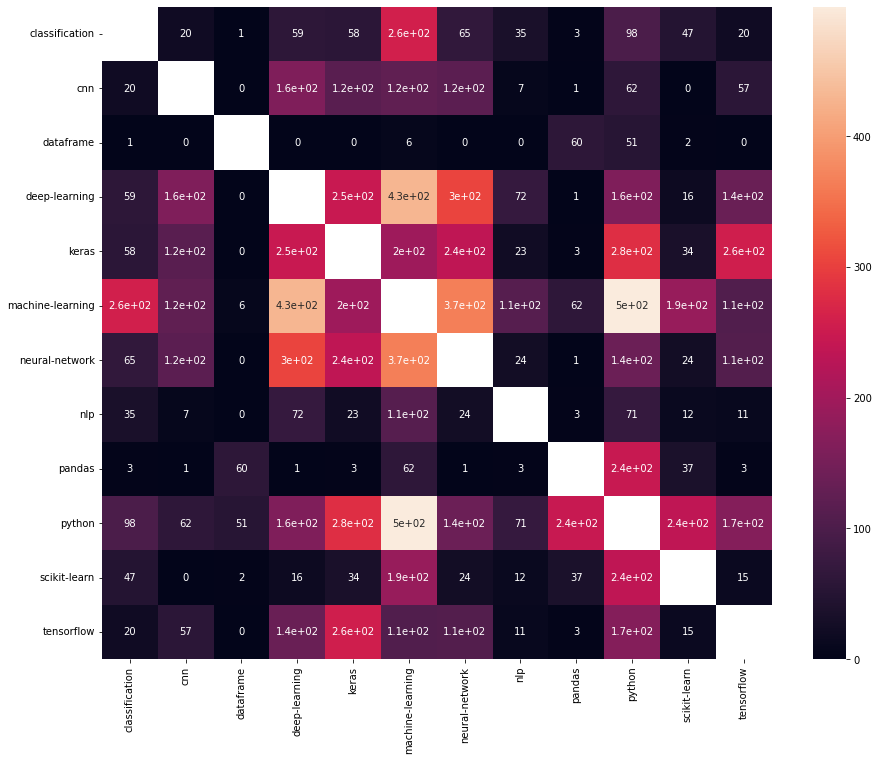

In [84]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(data = associations.loc[popular_tags, popular_tags], annot = True)

## Enter Domain Knowledge

Using the heatmap above, we can identify that
1. 'machine-learning' was the most frequent tag appearing with 'python', suggesting a high interest of using python for machine learning applications. 
2. 'deep-learning' was a subset topic of 'machine-learning', thus they were mentioned often together. 
3. 'neural-network' was one type of 'machine-learning', particularly 'deep-learning', therefore discussed alongside. 

## Just a Fad?

The file `all_questions.csv` holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

`
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
`

In [85]:
questions_all = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])
questions_all.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [86]:
# no missing value
questions_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [87]:
questions_all['Tags'] = questions_all['Tags'].str.replace('<','').str.replace('>',',').str.strip(',').str.split(',')
questions_all.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [88]:
# define tags relevant to deep learning

dl_tags = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

def is_dl_related(tags, dl_tags):
    
    for dl_tag in dl_tags:
        if dl_tag in tags:
            return 1
    return 0
    
questions_all['DL_related'] = questions_all['Tags'].apply(is_dl_related, dl_tags = dl_tags) 

In [89]:
questions_all.head()

,Id,CreationDate,Tags,DL_related
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


Decide on an adequate timeframe and track interest in deep learning across that timeframe:
* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount of questions per time period;

In [90]:
questions_all['CreationDate'].describe()

C:\Users\Lu\AppData\Local\Temp/ipykernel_6688/2527227533.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  questions_all['CreationDate'].describe()


count                   21576
unique                  21575
top       2019-09-25 18:32:47
freq                        2
first     2014-05-13 23:58:30
last      2020-01-19 03:01:03
Name: CreationDate, dtype: object

In [91]:
# Consider using quarter as timeframe

def quarter(date):
    
    month = date.month
    quarter = int(np.ceil(month/3))
    year = date.year
    
    return str(year) + 'Q' + str(quarter)

questions_all['Quarter'] = questions_all['CreationDate'].apply(quarter)

In [92]:
questions_all.sample(10)

,Id,CreationDate,Tags,DL_related,Quarter
2867,56565,2019-07-29 13:35:35,[clustering],0,2019Q3
18409,64325,2019-12-06 11:33:12,"[machine-learning, xgboost, boosting]",0,2019Q4
21448,36645,2018-08-08 15:03:06,"[python, neural-network, machine-learning-model]",1,2018Q3
17380,63765,2019-11-26 02:19:14,"[machine-learning, python, pytorch]",0,2019Q4
4931,39199,2018-10-04 19:17:23,"[machine-learning, decision-trees, supervised-...",0,2018Q4
3587,26048,2017-12-27 16:00:00,"[data-cleaning, pandas, jupyter, ipython, data...",0,2017Q4
16105,31833,2018-05-18 23:20:58,"[scikit-learn, parallel]",1,2018Q2
15416,10950,2016-03-29 22:46:48,[graphs],0,2016Q1
4127,26236,2018-01-03 15:20:29,"[clustering, text-mining, unsupervised-learning]",0,2018Q1
10636,42200,2018-12-06 01:30:37,[r],0,2018Q4


In [93]:
dl_questions = questions_all.groupby('Quarter').agg({'DL_related': ['size', np.sum]})
dl_questions.head()

DL_related    
              size sum
Quarter               
2014Q2         157   9
2014Q3         189  13
2014Q4         216  21
2015Q1         190  18
2015Q2         284  28

In [94]:
dl_questions.reset_index(inplace = True)
dl_questions.columns = ['Quarter', 'Total', 'DL_related']
dl_questions['DL_percentage'] = round(dl_questions['DL_related']/dl_questions['Total']*100, 2)

In [95]:
dl_questions.sample(10)

,Quarter,Total,DL_related,DL_percentage
9,2016Q3,585,161,27.52
18,2018Q4,1294,531,41.04
2,2014Q4,216,21,9.72
15,2018Q1,1221,554,45.37
20,2019Q2,2393,935,39.07
21,2019Q3,2394,941,39.31
13,2017Q3,714,247,34.59
8,2016Q2,518,109,21.04
7,2016Q1,516,110,21.32
16,2018Q2,1448,566,39.09


C:\Users\Lu\AppData\Local\Temp/ipykernel_6688/3013041608.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, t in dl_questions['Total'].iteritems():


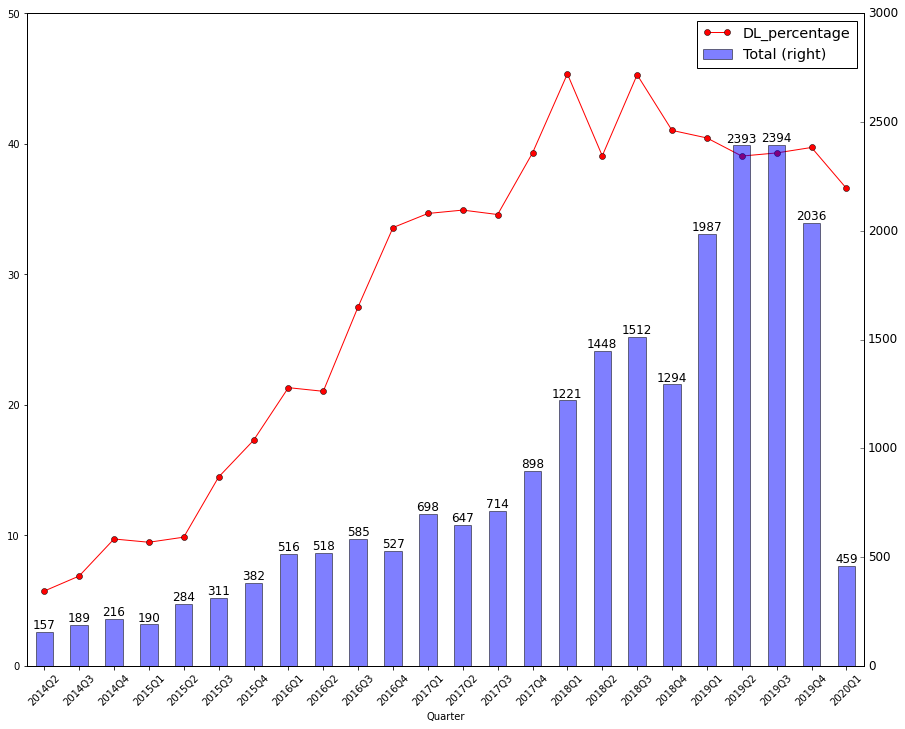

In [96]:
fig, ax = plt.subplots(figsize = (15,12))

plt.style.use('classic')

ax1 = dl_questions.plot(x = 'Quarter', y = 'DL_percentage', 
                        kind = 'line', ax = ax, 
                        marker = "o", color = "red", )


ax2 = dl_questions.plot(x = 'Quarter', y = 'Total',
                         kind = 'bar', ax = ax, 
                        secondary_y = True, color = 'blue',
                        alpha = 0.5, rot = 45)
ax1.set_ylim(0, 50)
ax2.set_ylim(0, 3000)

for idx, t in dl_questions['Total'].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")